In [1]:
from pap2 import *
from scipy.integrate import quad

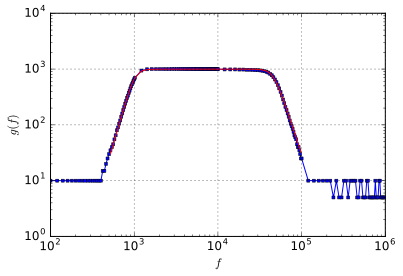

<IPython.core.display.Latex object>

In [7]:
f, U_a, _ = loadtxt("243\\3.txt", skiprows=1, unpack=True)
U_e = 0.2
D = 1e-3

g = 1/D * U_a/U_e

sl = (5e2 < f) & (f < 1e5)

def fit_g(f, V, O1, O2, n1, n2):
    return V/sqrt(1+1/(f/O1)**(2*n1))/sqrt(1+(f/O2)**(2*n2))
popt, pcov = curve_fit(fit_g, f[sl], g[sl], p0=[1000, 1000, 50000, 5, 5])
popt = un.uarray(popt, sqrt(diagonal(pcov)))

fit_g2 = lambda f, p: fit_g(f, *p)**2

B = quad(fit_g2, 0, inf, args=un.nominal_values(popt))

figure()
errorbar(f, g, fmt='bs-')
plot(f[sl], fit_g(f[sl], *un.nominal_values(popt)), 'r-')
xlabel("$f$")
ylabel("$g(f)$")
xscale('log')
yscale('log')
grid()
show()

table_g = Table("Tabelle 1: Fitparameter des Frequenzgangs")
table_g.add_row(["$V$", pformat(popt[0])])
table_g.add_row(["$\Omega_1$", pformat(popt[1])])
table_g.add_row(["$\Omega_2$", pformat(popt[2])])
table_g.add_row(["$n_1$", pformat(popt[3])])
table_g.add_row(["$n_2$", pformat(popt[4])])
# table_g.add_row("$\Chi^2$", pformat())

display_latex("$B={:1.2E}$".format(B[0]))